# Task 1

#                             Prediction using Supervised ML

In [178]:
#import all neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import the Dataset

In [179]:
df=pd.read_csv("Marks.csv")
print("Dataset Loaded successfully!!!")

Dataset Loaded successfully!!!


In [180]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Visualization

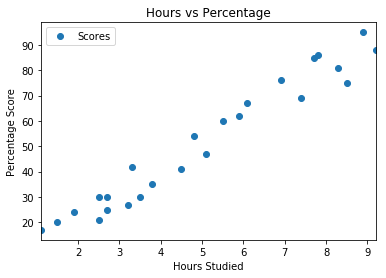

In [181]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

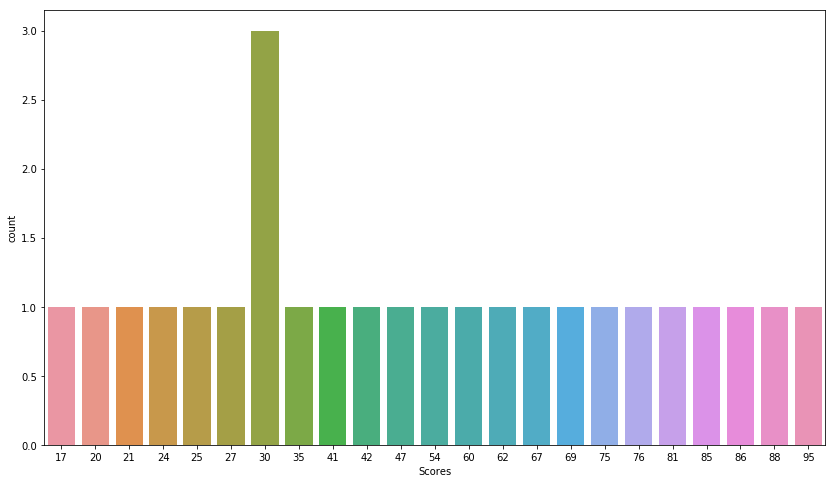

In [182]:
plt.figure(figsize=(14,8))
sns.countplot("Scores",data=df)

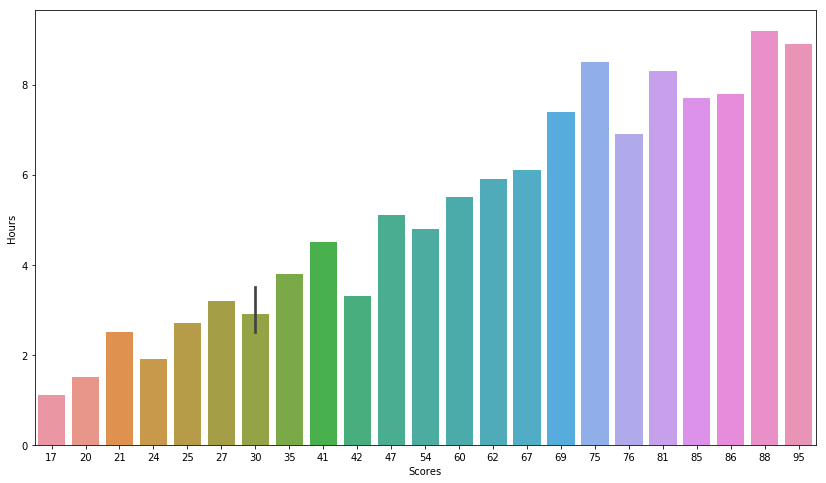

In [183]:
plt.figure(figsize=(14,8))
sns.barplot(x="Scores",y="Hours",data=df)

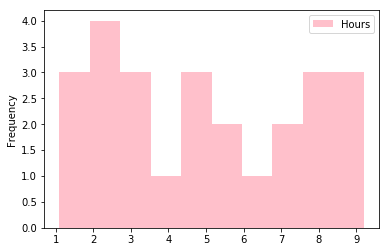

In [184]:
df.plot(y = 'Hours',kind='hist',color="pink")
plt.legend()
plt.show()

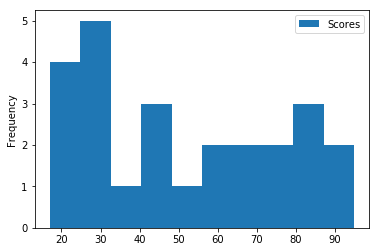

In [185]:
df.plot(y = 'Scores',kind='hist')
plt.legend()
plt.show()

# Data Wrangling

In [186]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [187]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [188]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Split the model into train and test model

In [189]:
x=df.iloc[:,:-1]
y=df.iloc[:,1]

In [190]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)



In [191]:
x_train.shape

(16, 1)

In [192]:
x_test.shape

(9, 1)

# Model Building

In [193]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [194]:
y_pred=regressor.predict(x_test)

In [195]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,17.042892
2,27,33.516954
19,69,74.217577
16,30,26.733516
11,62,59.681640
22,35,39.331329
17,24,20.919142
24,86,78.093827
23,76,69.372265


In [197]:
# You can also test with your own data

own_pred = regressor.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.14523314523314


# Visualizing the Training set Results

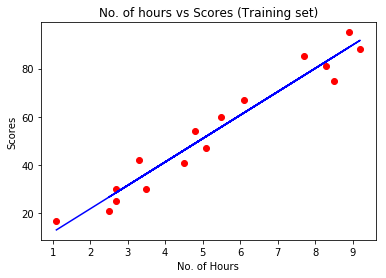

In [198]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,regressor.predict(x_train),color="blue")
plt.title('No. of hours vs Scores (Training set)')
plt.xlabel('No. of Hours')
plt.ylabel('Scores')
plt.show()

# Visualizing the Test set Results

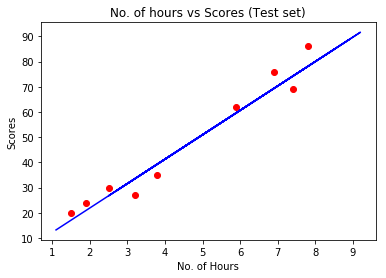

In [199]:
plt.scatter(x_test,y_test,color="red")
plt.plot(x_train,regressor.predict(x_train),color="blue")
plt.title('No. of hours vs Scores (Test set)')
plt.xlabel('No. of Hours')
plt.ylabel('Scores')
plt.show()

# Evaluating the Model

In [200]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.955570080138813

In [201]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.691397441397438
